In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as s
import initScripts as script
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [2]:
def testModel(df=None,X=['T-outside','H-outside','T-inside','H-inside','On'],y='KWH',model=None, params=None,times=10):
    X = df[X]
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
    clf = RandomizedSearchCV(model, params, random_state=0,n_jobs=-1,n_iter=10)
    modelClf = clf.fit(X_train,y_train)
    
    print("Best parameters for model")
    print(modelClf.best_params_)
    print("Best score for model")
    print(modelClf.best_score_)
    
    test = modelClf.predict(X_test)
    plt.scatter(X_test['T-outside'],test, c=X_test['T-inside'],cmap='plasma')
    plt.plot([15,15],[0,8])
    plt.colorbar()
    plt.title('Predicted')
    plt.show()
    
    plt.scatter(X_test['T-outside'],y_test, c=X_test['T-inside'],cmap='plasma')
    plt.plot([15,15],[0,8])
    plt.colorbar()
    plt.title('Default')
    plt.show()

### Elesatic net 56
### SVR 57

In [3]:
df = script.loadDataset('H')
df['On'] = df['T-outside'].apply(lambda x : 1 if x <= 15 else 0)

In [4]:
df.head()

,T-outside,H-outside,KWH,T-inside,H-inside,On
Time,,,,,,
2019-04-09 00:00:00,19.611111,45.0,6.670,28.698603,20.171211,0
2019-04-09 01:00:00,19.625000,45.0,6.626,28.700584,20.178471,0
2019-04-09 02:00:00,19.611111,45.0,4.788,28.698603,20.171211,0
2019-04-09 03:00:00,19.587500,45.0,4.378,28.695236,20.158869,0
2019-04-09 04:00:00,19.600000,45.0,4.210,28.697019,20.165403,0


In [5]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier
df['KWH'] = df['KWH'].apply(lambda x : truncate(x,2))
df['T-outside'] = df['T-outside'].apply(lambda x : truncate(x,0))
df['T-inside'] = df['T-inside'].apply(lambda x : truncate(x,0))
df['H-inside'] = df['H-inside'].apply(lambda x : truncate(x,0))
df['H-outside'] = df['H-outside'].apply(lambda x : truncate(x,0))

In [6]:
df.head()

,T-outside,H-outside,KWH,T-inside,H-inside,On
Time,,,,,,
2019-04-09 00:00:00,19.0,45.0,6.67,28.0,20.0,0
2019-04-09 01:00:00,19.0,45.0,6.62,28.0,20.0,0
2019-04-09 02:00:00,19.0,45.0,4.78,28.0,20.0,0
2019-04-09 03:00:00,19.0,45.0,4.37,28.0,20.0,0
2019-04-09 04:00:00,19.0,45.0,4.21,28.0,20.0,0


C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'kernel': 'rbf', 'gamma': 0.0001, 'epsilon': 0.5, 'C': 10}
Best score for model
0.5656195235184499


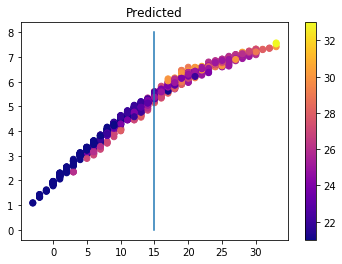

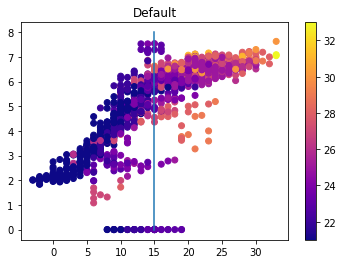

In [7]:
SVRestimator = SVR()
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
testModel(df=df,model=SVRestimator,params=parameters)


C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2927.9551436310207, tolerance: 1.3745932368060652
  positive)


Best parameters for model
{'selection': 'cyclic', 'max_iter': 5, 'l1_ratio': 0.30000000000000004, 'alpha': 0.0001}
Best score for model
0.5701650167168197


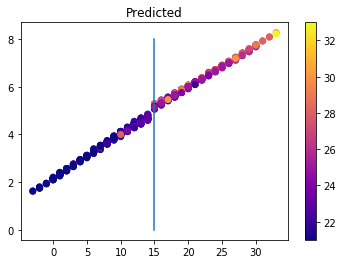

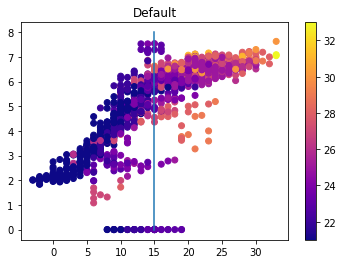

In [8]:
ElasticNet = ElasticNet()
parameters = {"max_iter": [1, 5, 10],"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1),'selection': ('random','cyclic')}
testModel(df=df,model=ElasticNet,params=parameters)


C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 5}
Best score for model
0.5716510634642205


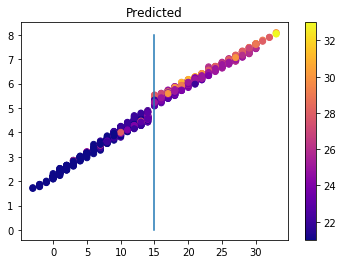

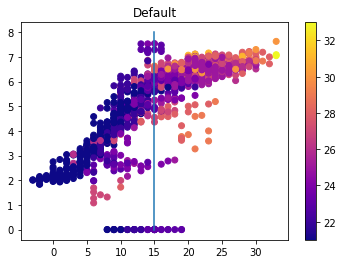

In [9]:
from sklearn.linear_model import Ridge
RidgeReg = Ridge()
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}

testModel(df=df,model=RidgeReg,params=parameters)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'penalty': 'l2', 'max_iter': 90, 'loss': 'huber'}
Best score for model
0.5489760369297221


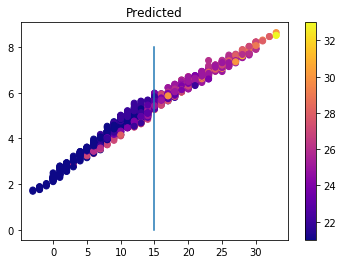

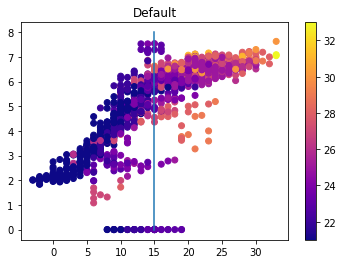

In [10]:
from sklearn import linear_model
SGD = linear_model.SGDRegressor()
parameters = {'loss':('squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'), 'penalty':('l2', 'l1', 'elasticnet'), 'max_iter':range(1,1000)}

testModel(df=df,model=SGD,params=parameters)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 0.5}
Best score for model
0.5658063047291975


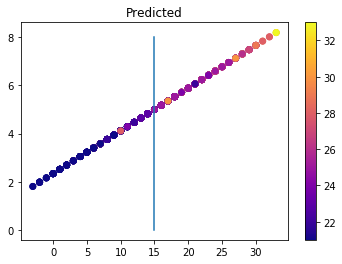

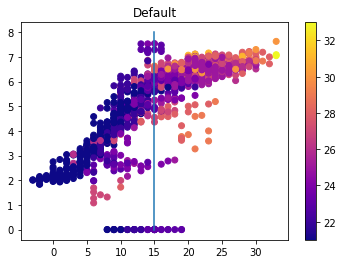

In [11]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
LassoModel = Lasso()
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}
testModel(df=df,model=LassoModel,params=parameters)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
Best score for model
0.565864736874644


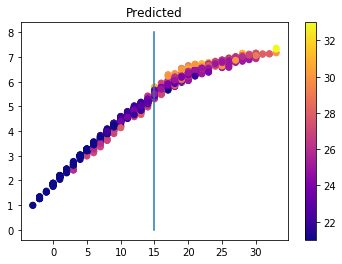

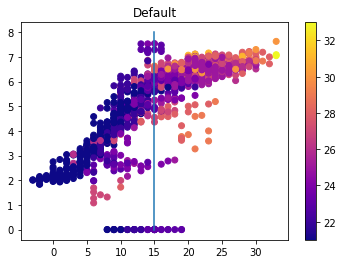

In [12]:
from sklearn.svm import NuSVR
NuSVRestimator = NuSVR()
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4]}
testModel(df=df,model=NuSVRestimator,params=parameters)


C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 5}
Best score for model
0.5711240974459015


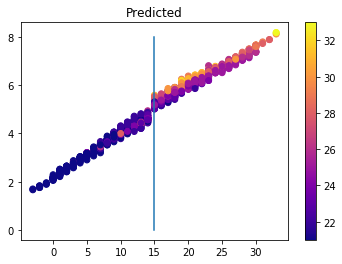

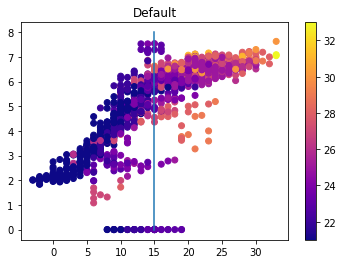

In [13]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge()
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}
testModel(df=df,model=kr,params=parameters)

Best parameters for model
{'weights': 'uniform', 'n_neighbors': 11, 'n_jobs': -1, 'leaf_size': 10, 'algorithm': 'kd_tree'}
Best score for model
0.7153482896909793


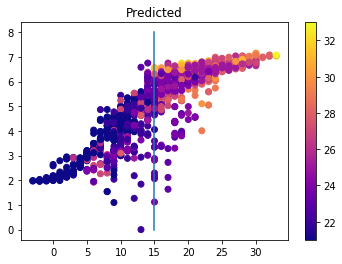

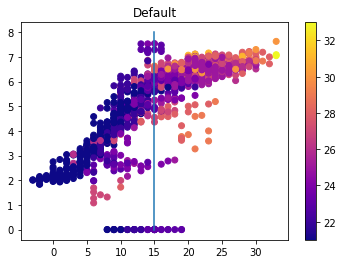

In [23]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
parameters = {'n_neighbors':[8,9,10,11,12,13,15,16,20,5],
          'leaf_size':[1,2,3,5,30,10,15,20],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
testModel(df=df,model=KNN,params=parameters)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 1}
Best score for model
0.5715903717390655


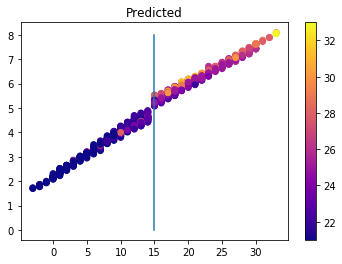

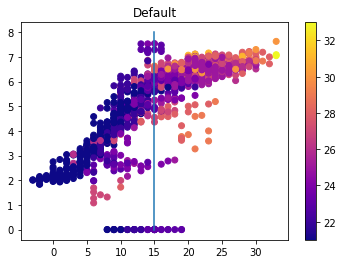

In [15]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0)
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}
testModel(df=df,model=gpr,params=parameters)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\William.Brach\AppData\Local\

Best parameters for model
{'random_state': 0, 'n_estimators': 6, 'base_estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)}
Best score for model
0.7002852386235519


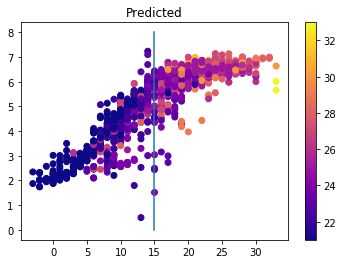

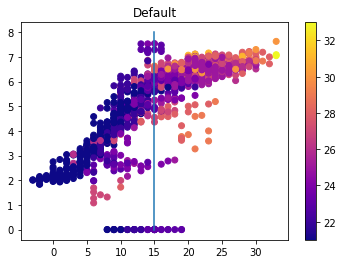

In [16]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor()
parameters = {'base_estimator':(SVR(),None),'n_estimators':range(1,10),'random_state':[0,1]}
testModel(df=df,model=bagging,params=parameters)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'random_state': 1, 'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best score for model
0.7354622191059805


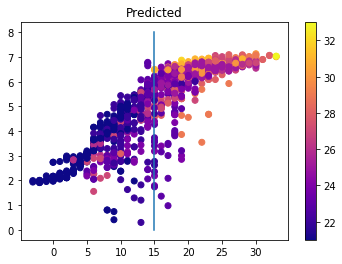

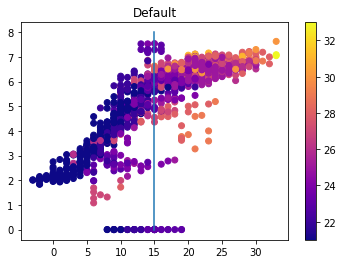

In [17]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
parameters = {'bootstrap': [True, False],'max_depth':[9,10,11,12,13,15,20,None], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'max_features': ['auto', 'sqrt'],'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],'random_state':[1,0]}
testModel(df=df,model=randomForest,params=parameters,times=40)